In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)


# Proyecto final (Parte II: Código solución)

Teniendo en cuenta el diagrama de flujo y las especificaciones de la primera parte, se procede a construir el código en aras de solucionar la problemática planteada.

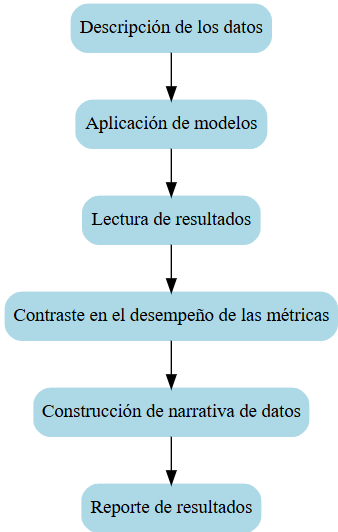

### 1. Descripción de datos

In [2]:
# Comenzamos importando los datos con los que trabajaremos:
#Comenzamos con los datos referentes a los contratos

contact = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 19 (Proyecto final)/Datos/final_provider/final_provider/contract.csv')
contact

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [3]:
contact.info()
#No tenemos datos nulos en este dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
#Ahora importamos los datos referentes al internet:
internet = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 19 (Proyecto final)/Datos/final_provider/final_provider/internet.csv')
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [5]:
internet.info()
#Tampoco tenemos datos nulos en este dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [6]:
#Seguimos con los datos personales del cliente:
personal = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 19 (Proyecto final)/Datos/final_provider/final_provider/personal.csv')
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [7]:
personal.info()
#No hay datos nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [8]:
#Por último, importamos los datos de telefonía:
phone = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 19 (Proyecto final)/Datos/final_provider/final_provider/phone.csv')
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [9]:
phone.info()
#Estos datos también están completos, sin datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### Distribución de del cliente en función del sexo

La idea de esbozar esta distribución tiene como objetivo ver qué parte del público está consumiendo más el servicio, si son hombres o mujeres. Así, la empresa tendrá una idea para el propio ajuste de la publicidad, la toma de desiciones para posibles nuevos paquetes, identificar los patrones de consumo, entre otros razgos descriptivos que corresponden a la demanda.

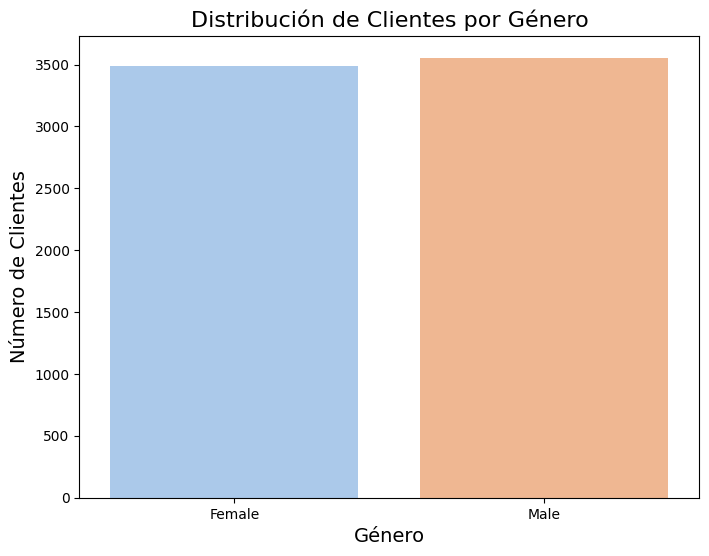

In [10]:
#Construimos un histograma para ver la distribución de los clientes en función del sexo:
warnings.filterwarnings('ignore')
plt.figure(figsize=(8, 6))
sns.countplot(data=personal, x='gender', palette='pastel')
plt.title('Distribución de Clientes por Género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.show()

Como se puede apreciar en el gráfico, el consumo no es diferenciado en función al sexo, esto dice que el trabajo de marketing es indistinto, y no tiene efectos en la demanda del servicio. 

### ¿Qué tipo de servicio de intenet se consume más, fibra óptica o DSL?

Vamos a identificar qué tipo de servicio tiene mayor impacto en la demanda de internet en este mercado, el análisis sirve para la distribución de recuros propios a los tipos de servicio.

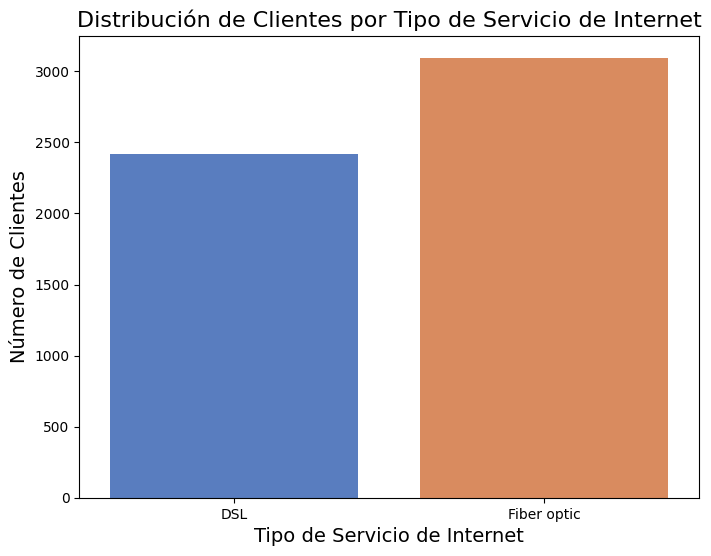

In [11]:
#Creamos otro gráfico para visualizar mejor la distribución del servicio de internet:
plt.figure(figsize=(8, 6))
sns.countplot(data=internet, x='InternetService', palette='muted')
plt.title('Distribución de Clientes por Tipo de Servicio de Internet', fontsize=16)
plt.xlabel('Tipo de Servicio de Internet', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.show()

Se consume un poco más el servicio de fibra óptica, quizá pueda ser por las características tecnológicas, precios, etc. Pero aún así, el servicio DSL tiene una significancia en la demanda. 

### Análisis de los otros servicios que la empresa ofrece

Se crea este esbozo del comportamiento de la demanda de los otros servicios que se ofrecen al consumidor, con el objetivo de crear un punto de partida para la toma de decisiones, así como la propia distribución de recursos.

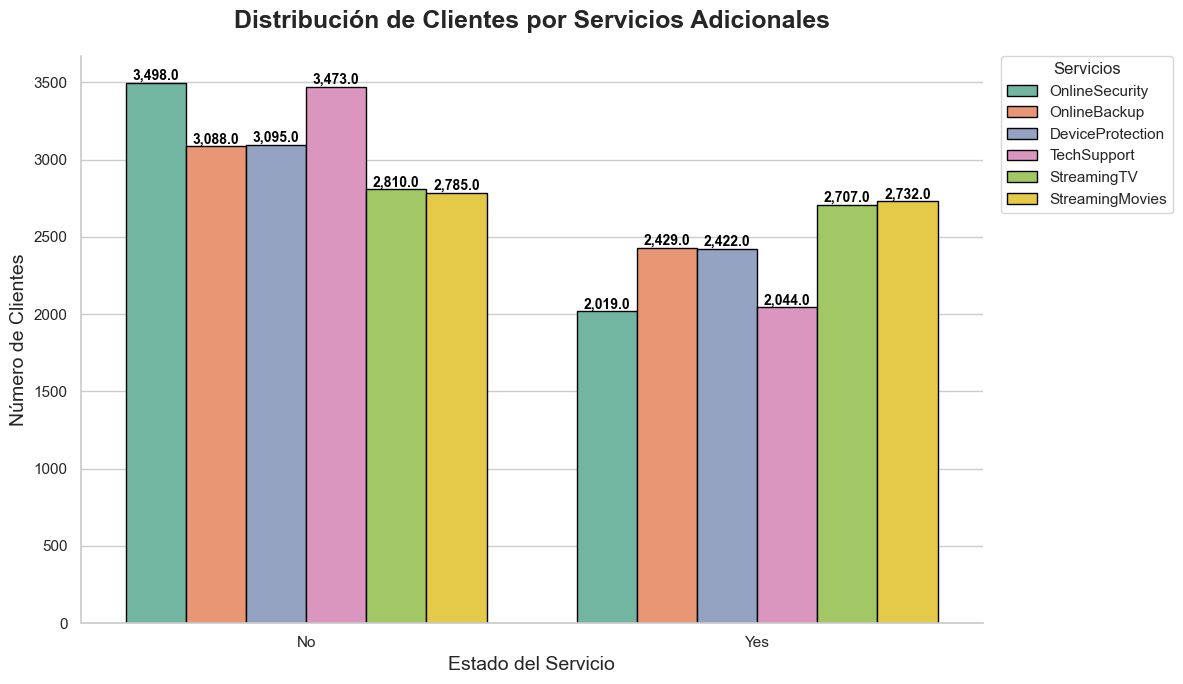

In [12]:
#Para estos efectos graficamos en un solo gráfico los otros servicios que se ofrecen:
sns.set_theme(style="whitegrid")

# Transformación de los datos
df_melt = internet.melt(
    id_vars=['customerID'],
    value_vars=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
)

plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=df_melt,
    x='value',
    hue='variable',
    palette='Set2',
    edgecolor="black"
)

# Títulos y etiquetas
plt.title('Distribución de Clientes por Servicios Adicionales', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Estado del Servicio', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)


plt.legend(
    title='Servicios',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=11,
    title_fontsize=12
)

# Acotaciones de los valores en las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:,}',  # separador de miles
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            color='black', rotation=0
        )


sns.despine()
plt.tight_layout()
plt.show()

Este gráfico proporciona puntualmente a manera de contraste al cliente que no hace uso de los servicios extra que la compañía ofrece, frente al cliente que si lo hace. Como se puede ver, existe un mayor número de clientes que no demandan los servicios extras. 

Se recomienda hacer ajustes en el trabajo de marketing, hacer un estudio de mercado segmentando a los consumidores, para posteriormente poder hacer una proyección de la probabilidad de consumo de los clientes (esta proyección se modelaría con los mismos modelos, una regresión logística, y el modelo de random forest, juntos con sus respectivas métricas).

### Análisis del consumo de telefonía y consumo de internet

Contraponer los principales servicios de la compañía también tiene una óptica de asignación de recursos, orientado a la innovación y mejora del producto; servirá para potenciar los números de la compañía, y por ende, los ingresos de la misma.

In [13]:
#Para esto, vamos a crear un nuevo dataframe universal a partir de todos los datos, uniéndolos por el customerID.
df_universal = (internet
                .merge(phone, on='customerID', how='inner')
                .merge(personal, on='customerID', how='inner')
                .merge(contact, on='customerID', how='inner'))
df_universal

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,No,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
1,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,No,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
2,9237-HQITU,Fiber optic,No,No,No,No,No,No,No,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
3,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,Female,0,No,No,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
4,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No,Yes,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,8456-QDAVC,Fiber optic,No,No,No,No,Yes,No,No,Male,0,No,No,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1
4831,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
4832,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Female,0,Yes,Yes,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
4833,8361-LTMKD,Fiber optic,No,No,No,No,No,No,Yes,Male,1,Yes,No,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


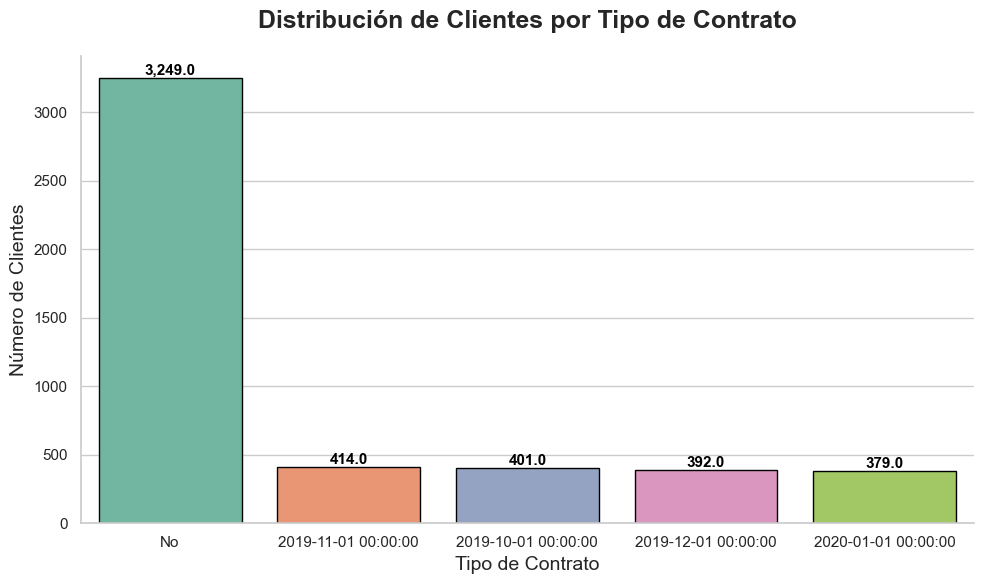

In [14]:
#Vamos a estudiar los contratos activos que tiene la empresa, frente al cliente que no renovó su contrato.

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_universal,
    x='EndDate',
    palette='Set2',
    order=df_universal['EndDate'].value_counts().index,  # ordena por frecuencia
    edgecolor="black"
)

# Títulos y etiquetas
plt.title('Distribución de Clientes por Tipo de Contrato', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)

# Acotación de los datos
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,}',  # separador de miles
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=11, fontweight='bold',
        color='black'
    )


sns.despine()
plt.tight_layout()
plt.show()


Como se puede ver, hay un gran número de clientes que no renovaron su contrato, frente a los que todavía les faltaba algo de tiempo para renovar, si bien, la base de datos no da precisión en qué punto del tiempo se tiene actualización de los datos, se parte del supuesto que los que no están dentro la categoría "No", siguen vigentes.

Esta información es crucial para el trabajo citado en la parte de arriba, sea orientado a la calidad bruta del servicio, marketing, servicio de atención al cliente, soporte, el producto de la competencia, una falta de innovación, etc. 

### ¿El cliente tiende a demandar varias lineas telefónicas?

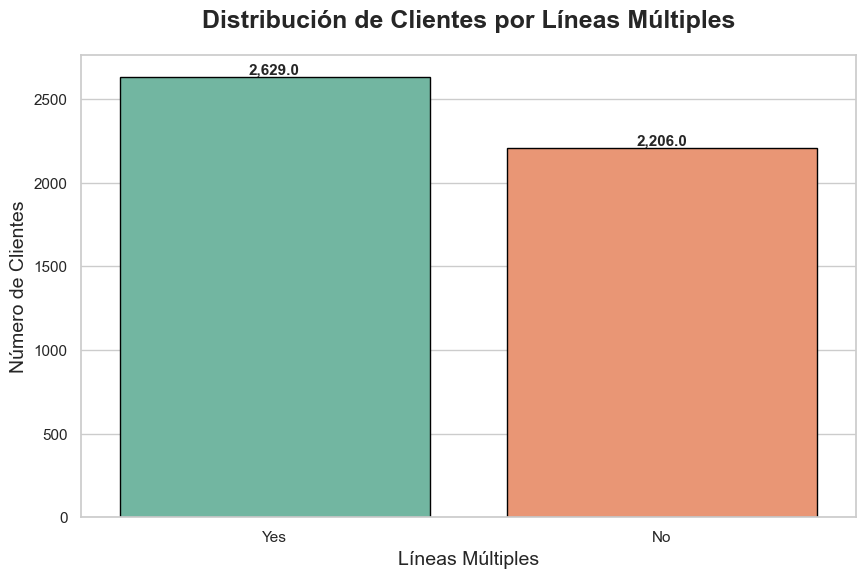

In [15]:
#Ahora estudiaremos si el cliente demanda lineas múltiples de telefonía:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df_universal,
    x='MultipleLines',
    palette='Set2',
    order=df_universal['MultipleLines'].value_counts().index,  
    edgecolor="black"
)
# Títulos y etiquetas
plt.title('Distribución de Clientes por Líneas Múltiples', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Líneas Múltiples', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
# Acotación de los datos
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,}',  
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=11, fontweight='bold')
    
plt.show()

El gráfico comparte información importante acerca del comportamiento del consumidor, en términos de líneas múltiples. Hay una prevalencia no absoluta del cliente que prefiere tener lineas múltiples, frente al que prefiere no contratar este servicio.

### 2. Construcción de los modelos probabilísticos

Para construír los modelos pobabilisticos se tomarán en cuenta las siguentes variables (se convierten en variables dummy):

- Contrato activo (que como hipótesis del análisis se tiene que existirá una probabilidad alta de no renovar el contrato).

- Si se demandan o no los servicios extras.

#### Regresión logística

In [16]:
#Convertimos a variables dummy las columnas que nos interesan para el análisis:

vars_categoricas = [
    'EndDate', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]
df_modelo = pd.get_dummies(df_universal[vars_categoricas], drop_first=True)

df_modelo.head()


,EndDate_2019-11-01 00:00:00,EndDate_2019-12-01 00:00:00,EndDate_2020-01-01 00:00:00,EndDate_No,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,False,False,False,True,False,False,True,False,True,False,False,False
1,False,True,False,False,False,False,True,True,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,True,True,False,False,True,False,True,True
4,False,False,False,True,True,True,False,True,False,False,True,False


Mejor parámetro C: {'C': np.float64(0.1668100537200059)}
Métricas de Regresión Logística Regularizada (Permanencia)
Accuracy:  0.7115
Precision: 0.7677
Recall:    0.8185
F1 Score:  0.7923
ROC-AUC:   0.7457


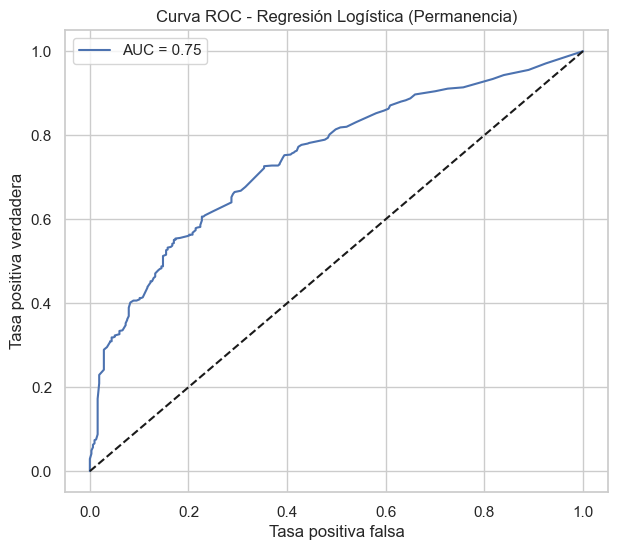

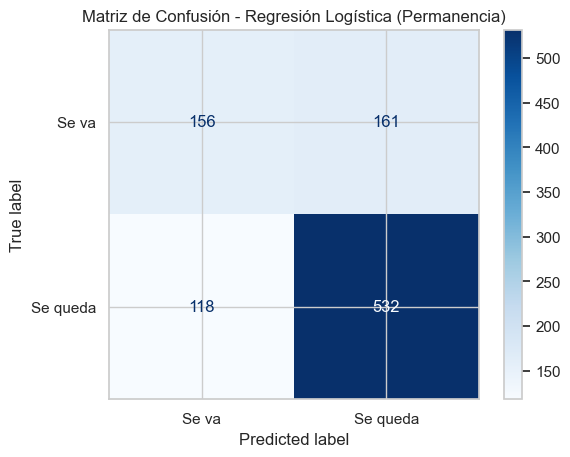

In [17]:
# Creamos la variable de permanencia (1 = se queda, 0 = se va)
df_universal['tasa_permanencia'] = df_universal['EndDate'].apply(lambda x: 1 if x == 'No' else 0)

# Variables categóricas a convertir en dummies 
categoricas = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Creamos un df_modelo con dummies
df_modelo = pd.get_dummies(df_universal[categoricas + ['tasa_permanencia']], drop_first=True)

#  X e y
X = df_modelo.drop(columns=['tasa_permanencia'])
y = df_modelo['tasa_permanencia']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345, stratify=y
)

# 6) Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Para la regularización con validación cruzada
param_grid = {'C': np.logspace(-3, 2, 10)}  # esto nos da la fuerza de regularización
grid = GridSearchCV(
    LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000),
    param_grid, cv=5, scoring='f1'
)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
print("Mejor parámetro C:", grid.best_params_)

# Predicciones y probabilidades
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# Métricas
print("Métricas de Regresión Logística Regularizada (Permanencia)")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Tasa positiva falsa")
plt.ylabel("Tasa positiva verdadera")
plt.title("Curva ROC - Regresión Logística (Permanencia)")
plt.legend()
plt.show()

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Se va","Se queda"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística (Permanencia)")
plt.show()


Vamos a imprimir algunas de las probabilidades:

In [18]:
# Probabilidades de permanencia con el mejor modelo encontrado
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# Construimos DataFrame con resultados
resultados = pd.DataFrame({
    "customerID": df_universal.loc[X_test.index, "customerID"].values,
    "Prob_Permanencia": y_prob,
    "Prediccion": y_pred,
    "Real": y_test.values
})

# Se muestran las primeras 50 filas
print(resultados.head(50))

    customerID  Prob_Permanencia  Prediccion  Real
0   8087-LGYHQ          0.458940           0     1
1   9220-ZNKJI          0.658286           1     1
2   1640-PLFMP          0.346722           0     1
3   0639-TSIQW          0.807501           1     0
4   6870-ZWMNX          0.918903           1     1
5   8510-AWCXC          0.605442           1     0
6   3196-NVXLZ          0.379939           0     1
7   7675-OZCZG          0.607673           1     0
8   4770-UEZOX          0.491031           0     1
9   6305-YLBMM          0.779622           1     0
10  1304-BCCFO          0.712266           1     1
11  6439-PKTRR          0.965622           1     1
12  1936-UAFEH          0.864861           1     1
13  2397-BRLOM          0.355935           0     0
14  2798-NYLMZ          0.842495           1     1
15  1027-LKKQQ          0.933683           1     1
16  9253-VIFJQ          0.921611           1     1
17  4815-YOSUK          0.903269           1     1
18  9773-PEQBZ          0.51683

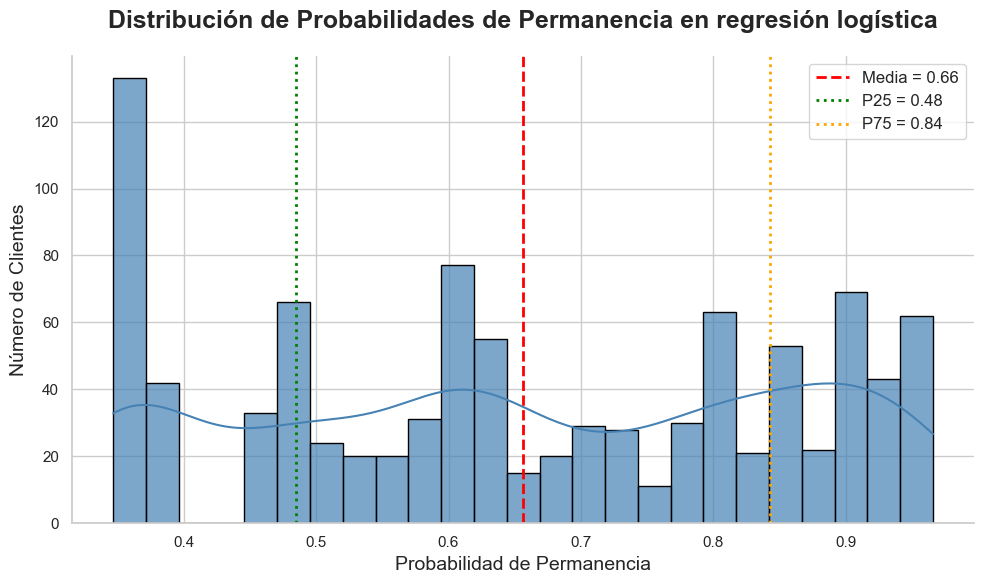

In [19]:
#Esbozo gráfico de probabilidades
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    resultados['Prob_Permanencia'],
    bins=25, kde=True,
    color='steelblue', edgecolor='black', alpha=0.7
)

# Líneas de referencia: media y percentiles
media = resultados['Prob_Permanencia'].mean()
p25 = resultados['Prob_Permanencia'].quantile(0.25)
p75 = resultados['Prob_Permanencia'].quantile(0.75)

plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Media = {media:.2f}")
plt.axvline(p25, color='green', linestyle=':', linewidth=2, label=f"P25 = {p25:.2f}")
plt.axvline(p75, color='orange', linestyle=':', linewidth=2, label=f"P75 = {p75:.2f}")

#Para el título y las etiquetas
plt.title('Distribución de Probabilidades de Permanencia en regresión logística', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Probabilidad de Permanencia', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)


plt.legend(frameon=True, fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [20]:
# Probabilidad media predicha
print("Media de probabilidad predicha:", y_prob.mean())

# Tasa real de permanencia
print("Tasa real de permanencia:", y_test.mean())

Media de probabilidad predicha: 0.655929233255783
Tasa real de permanencia: 0.672182006204757


### Modelo random forest

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}
Métricas de Random Forest Regularizado (Permanencia)
Accuracy:  0.6670
Precision: 0.8094
Recall:    0.6600
F1 Score:  0.7271
ROC-AUC:   0.7351


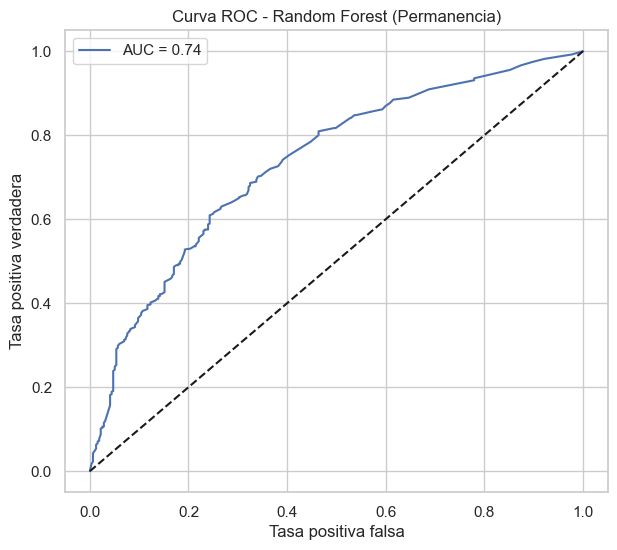

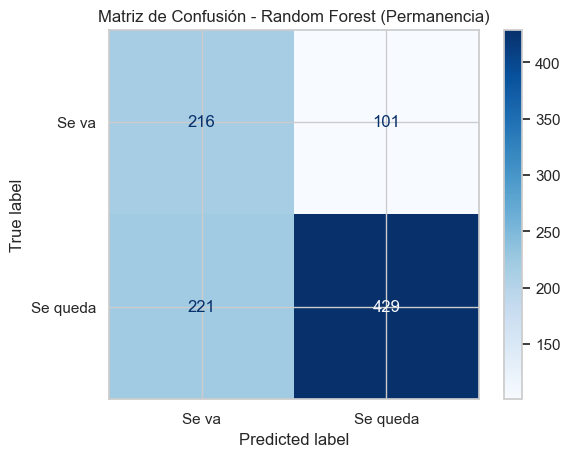

In [21]:
# Creamos variable de permanencia (1 = se queda, 0 = se va), que es el mismo criterio que antes
df_universal['tasa_permanencia'] = df_universal['EndDate'].apply(lambda x: 1 if x == 'No' else 0)

# Variables categóricas 
categoricas = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

#  df_modelo con dummies
df_modelo = pd.get_dummies(df_universal[categoricas + ['tasa_permanencia']], drop_first=True)

# Definir X e y
X = df_modelo.drop(columns=['tasa_permanencia'])
y = df_modelo['tasa_permanencia']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ajustamos hiperparámetros con validación cruzada
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10]
}

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Mejores hiperparámetros:", grid.best_params_)

# Predicciones y probabilidades
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_prob_rf >= 0.5).astype(int)

# 8) Métricas
print("Métricas de Random Forest Regularizado (Permanencia)")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob_rf):.4f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob_rf):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Tasa positiva falsa")
plt.ylabel("Tasa positiva verdadera")
plt.title("Curva ROC - Random Forest (Permanencia)")
plt.legend()
plt.show()

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Se va","Se queda"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Random Forest (Permanencia)")
plt.show()


De la misma manera, imprimimos las probabilidades

In [22]:
# Probabilidades de permanencia (clase 1 = se queda)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]   
y_pred_rf = (y_prob_rf >= 0.5).astype(int)

# Construir DataFrame con resultados
resultados_rf = pd.DataFrame({
    "customerID": df_universal.loc[X_test.index, "customerID"].values,
    "Prob_Permanencia": y_prob_rf,
    "Prediccion": y_pred_rf,
    "Real": y_test.values
})

# Se muestran las 50 primeras filas
print(resultados_rf.head(50))

    customerID  Prob_Permanencia  Prediccion  Real
0   3701-SFMUH          0.617092           1     1
1   9357-UJRUN          0.774705           1     1
2   2474-BRUCM          0.471591           0     0
3   8749-JMNKX          0.623598           1     0
4   0533-UCAAU          0.840054           1     1
5   4868-AADLV          0.858424           1     1
6   0080-OROZO          0.556388           1     1
7   3566-VVORZ          0.409886           0     1
8   9152-AMKAK          0.893671           1     1
9   2632-UCGVD          0.413025           0     0
10  2672-OJQZP          0.409886           0     1
11  6439-LAJXL          0.792544           1     1
12  1196-AMORA          0.236697           0     0
13  0997-YTLNY          0.662735           1     1
14  3259-FDWOY          0.373326           0     0
15  0334-GDDSO          0.378194           0     0
16  9603-OAIHC          0.269996           0     1
17  7878-JGDKK          0.409886           0     1
18  4000-VGMQP          0.88373

Para el esbozo gráfico de la probabilidad bajo el análisis de bosque aleatorio:

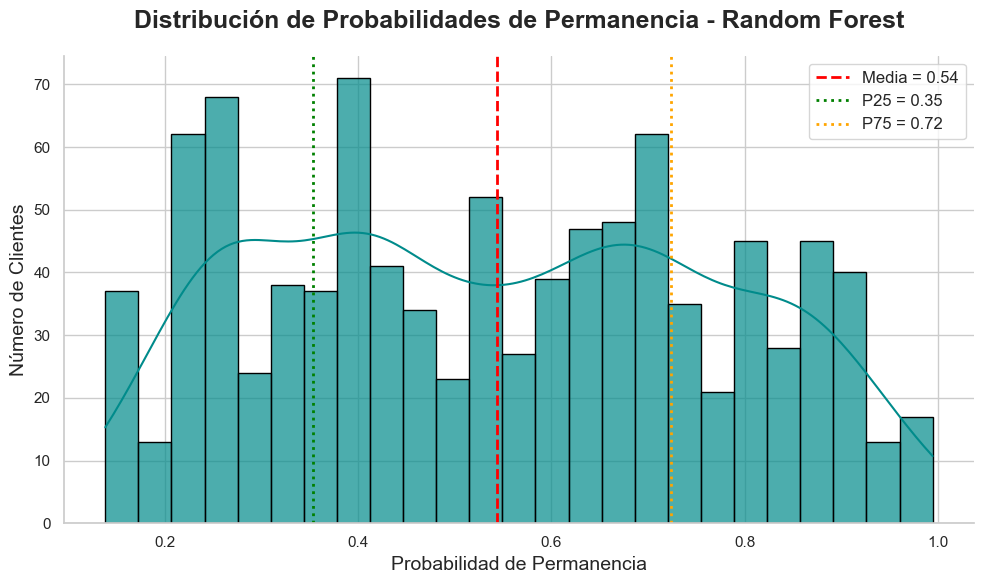

In [23]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    resultados_rf['Prob_Permanencia'],
    bins=25, kde=True,
    color='darkcyan', edgecolor='black', alpha=0.7
)

# Calculamos los estadísticos
media = resultados_rf['Prob_Permanencia'].mean()
p25 = resultados_rf['Prob_Permanencia'].quantile(0.25)
p75 = resultados_rf['Prob_Permanencia'].quantile(0.75)

# Para las líneas de referencia
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Media = {media:.2f}")
plt.axvline(p25, color='green', linestyle=':', linewidth=2, label=f"P25 = {p25:.2f}")
plt.axvline(p75, color='orange', linestyle=':', linewidth=2, label=f"P75 = {p75:.2f}")

# Títulos y etiquetas
plt.title("Distribución de Probabilidades de Permanencia - Random Forest", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Probabilidad de Permanencia", fontsize=14)
plt.ylabel("Número de Clientes", fontsize=14)

plt.legend(frameon=True, fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

### Comparación correspondiente a las probabilidades calculadas

In [24]:
# Unimos los resultados de ambos modelos usando el índice de prueba:
comparacion = pd.DataFrame({
    "customerID": df_universal.loc[X_test.index, "customerID"],
    "Prob_Logistica": y_prob,   # es la probabilidad de permanencia (logística)
    "Pred_Logistica": y_pred,   # predicción binaria (logística)
    "Prob_RandomForest": y_prob_rf, # probabilidad de permanencia (RF)
    "Pred_RandomForest": y_pred_rf, # predicción binaria (RF)
    "Real": y_test.values           # valor real
})

# Calcular diferencia de probabilidades entre modelos
comparacion["Diferencia_Prob"] = (comparacion["Prob_RandomForest"] - comparacion["Prob_Logistica"]).round(3)

# Mostrar primeras filas
print(comparacion.head(10))

      customerID  Prob_Logistica  Pred_Logistica  Prob_RandomForest  \
399   3701-SFMUH        0.458940               0           0.617092   
2060  9357-UJRUN        0.658286               1           0.774705   
4459  2474-BRUCM        0.346722               0           0.471591   
2364  8749-JMNKX        0.807501               1           0.623598   
3375  0533-UCAAU        0.918903               1           0.840054   
4426  4868-AADLV        0.605442               1           0.858424   
839   0080-OROZO        0.379939               0           0.556388   
3556  3566-VVORZ        0.607673               1           0.409886   
3865  9152-AMKAK        0.491031               0           0.893671   
2937  2632-UCGVD        0.779622               1           0.413025   

      Pred_RandomForest  Real  Diferencia_Prob  
399                   1     1            0.158  
2060                  1     1            0.116  
4459                  0     0            0.125  
2364                  

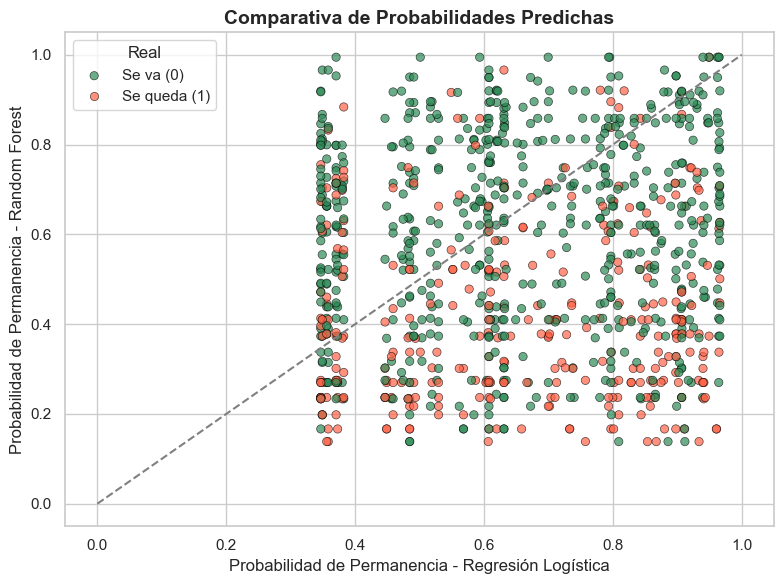

In [25]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))

# Scatterplot para las probabilidades
sns.scatterplot(
    x=comparacion["Prob_Logistica"],
    y=comparacion["Prob_RandomForest"],
    hue=comparacion["Real"],   # colorear según valor real (0=se va, 1=se queda)
    palette={0: "tomato", 1: "seagreen"},
    alpha=0.7,
    edgecolor="black"
)

# Línea de referencia y = x
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", linewidth=1.5)

# Etiquetas y título
plt.xlabel("Probabilidad de Permanencia - Regresión Logística", fontsize=12)
plt.ylabel("Probabilidad de Permanencia - Random Forest", fontsize=12)
plt.title("Comparativa de Probabilidades Predichas", fontsize=14, weight="bold")

plt.legend(title="Real", labels=["Se va (0)", "Se queda (1)"])
plt.tight_layout()
plt.show()

#### Comparación en la densidad de las probabilidades

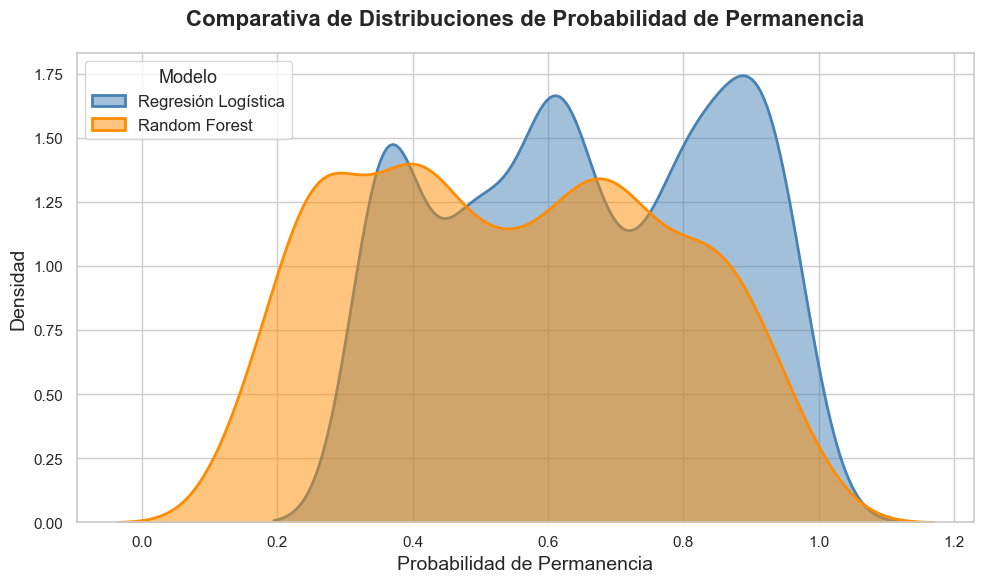

In [26]:

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# para regresión logística
sns.kdeplot(
    x=comparacion["Prob_Logistica"],
    fill=True,
    color="steelblue",
    alpha=0.5,
    linewidth=2,
    label="Regresión Logística"
)

# para modelo de random forest
sns.kdeplot(
    x=comparacion["Prob_RandomForest"],
    fill=True,
    color="darkorange",
    alpha=0.5,
    linewidth=2,
    label="Random Forest"
)
#Etiquetas:
# Títulos y etiquetas
plt.title("Comparativa de Distribuciones de Probabilidad de Permanencia", fontsize=16, weight='bold', pad=20)
plt.xlabel("Probabilidad de Permanencia", fontsize=14)
plt.ylabel("Densidad", fontsize=14)

plt.legend(title="Modelo", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

### Conclusiones:

Se regularizaron los modelos a razón de que ambos tenían un sobreajuste para tener un comportamiento equilibrado y tener utilidad en la clasificación de los datos, para esto, ambos modelos tienen una capacidad similar para discriminar a los clientes que se van con los que se quedan, ya que se obtiene una puntuación de ROC-AUC de 0.75 en regresión logística y 0.74 en bosque aleatorio, respectivamente.

Siguiendo esta misma orientación comparativa entre modelos, el modelo de regresión logística tiene mejor desempeño en la clasificación, es importante mencionar que el modelo de bosque aleatorio no tiene mal desempeño en comparación de la regresión logística, pero si hay una diferencia significativa, ya que en regresión logística hay una detección del 82% de los clientes que renuevan su contrato frente a un 67% de detección en bosque aleatorio (puntuación recall).

De esta manera, se recomienda usar el modelo de regresión logística, para este caso en particular.


##### Nota importante:

**En esta parte del proyecto no se incluyen propiamente las interpretaciones de las métricas, ni de los resultados, ya que de acuerdo al diagrama de flujo presentado en la primera parte y al principio de esta, se elaborará en la tercera y última parte, el informe correspondiente; mismo que incluyen interpretaciones orientadas a la decisión basada en datos y el análisis de los resultados y métricas.**

In [27]:
# Exportar el DataFrame comparacion a CSV
comparacion.to_csv("comparacion.csv", index=False)
print("Archivo comparacion.csv exportado correctamente")

Archivo comparacion.csv exportado correctamente
